# This is for automatically plot glue layer thickness vs. positions and sensor module thichness vs. positions of one module
The error bar on each datapoint refelct the maximal and minimal measurement performed by each person at that point

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
str_filename = 'SM measurements.csv'
# str_filename = 'Test_472-024-046.csv'
str_module = '472-024-046'      

In [3]:
# df = pd.read_csv(str_filename, header = None, skiprows=1, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
df = pd.read_csv(str_filename)
# df

Calculate glue layer thicknesses at four different positions

In [4]:
df['GL1'] = df.module_p1 - df.LYSO_p1 - df.SiPM1_p4 - df.SiPM2_p1
df['GL2'] = df.module_p2 - df.LYSO_p2 - df.SiPM1_p3 - df.SiPM2_p2
df['GL3'] = df.module_p3 - df.LYSO_p3 - df.SiPM1_p2 - df.SiPM2_p3
df['GL4'] = df.module_p4 - df.LYSO_p4 - df.SiPM1_p1 - df.SiPM2_p4

In [5]:
df_id = df[df["id"] == str_module]   #pick module 472
# df_id

Select SM thichness data and plot

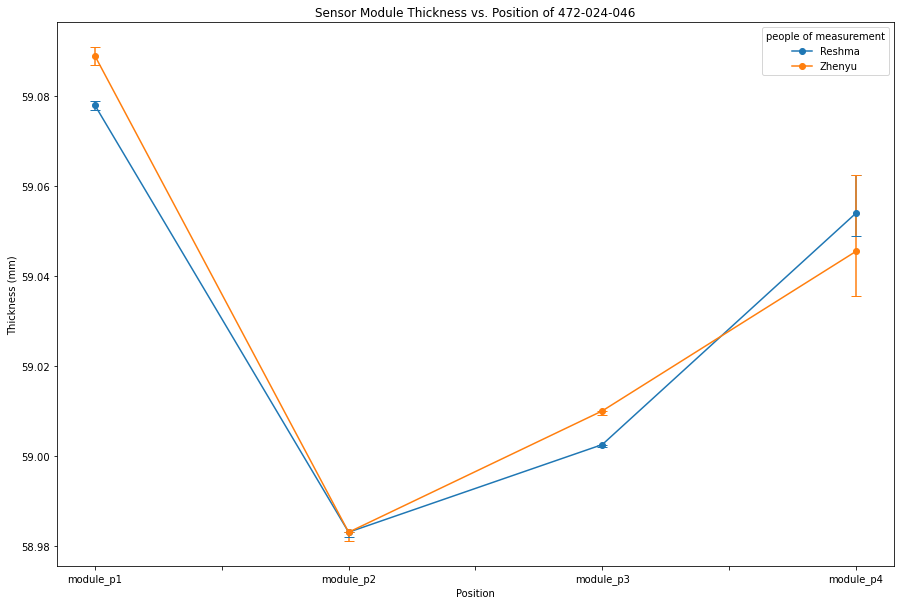

In [6]:
df_SM = df_id.loc[:,["people of measurement","module_p1","module_p2","module_p3","module_p4"]]
df_SMmax = df_SM.groupby("people of measurement")[["module_p1","module_p2","module_p3","module_p4"]].max()
df_SMmin = df_SM.groupby("people of measurement")[["module_p1","module_p2","module_p3","module_p4"]].min()
df_SMavg = df_SM.groupby("people of measurement")[["module_p1","module_p2","module_p3","module_p4"]].mean()     #average each person's measurements

df_SMavg.T.plot(yerr=[df_SMavg - df_SMmin, df_SMmax-df_SMmin], capsize=5, marker='o', figsize=(15,10))
plt.xlabel('Position')
plt.ylabel('Thickness (mm)')
plt.title('Sensor Module Thickness vs. Position of ' + str_module)
plt.show()

Select glue layer thichness data and plot

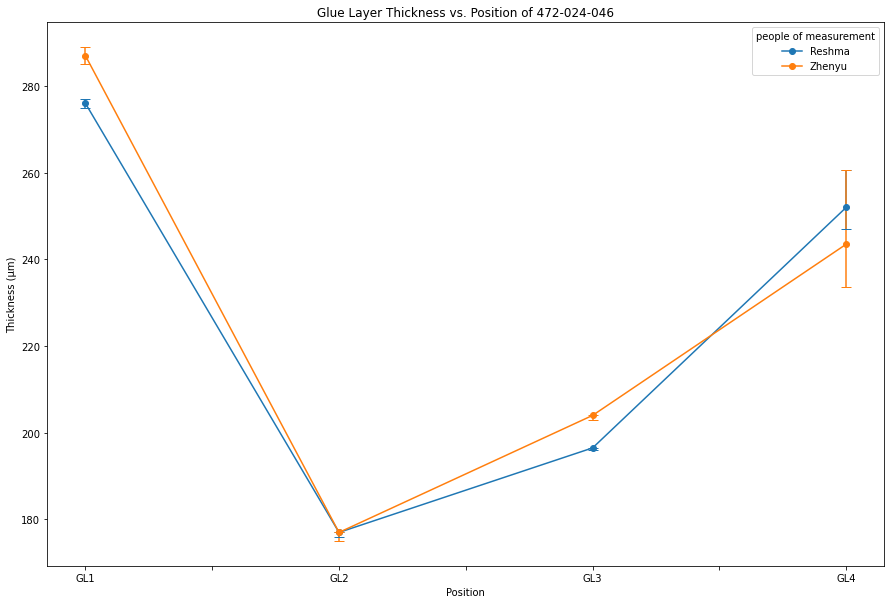

In [7]:
df_G = df_id.loc[:,["people of measurement","GL1","GL2","GL3","GL4"]]
df_Gmax = df_G.groupby("people of measurement")[["GL1","GL2","GL3","GL4"]].max()*1000
df_Gmin = df_G.groupby("people of measurement")[["GL1","GL2","GL3","GL4"]].min()*1000
df_Gavg = df_G.groupby("people of measurement")[["GL1","GL2","GL3","GL4"]].mean()*1000

df_Gavg.T.plot(yerr=[df_Gavg - df_Gmin, df_Gmax-df_Gmin], capsize=5, marker='o', figsize=(15,10))
plt.xlabel('Position')
plt.ylabel('Thickness (μm)')
plt.title('Glue Layer Thickness vs. Position of ' + str_module)
plt.show()